# ShellSage

> ShellSage saves sysadmins' sanity by solving shell script snafus super swiftly

ShellSage is an AI-powered command-line assistant that integrates seamlessly with your terminal workflow through tmux. It provides contextual help for shell operations, making it easier to navigate complex command-line tasks, debug scripts, and manage your system.

[![PyPI version](https://badge.fury.io/py/shell-sage.svg)](https://badge.fury.io/py/shell-sage)
[![Python 3.8+](https://img.shields.io/badge/python-3.10+-blue.svg)](https://www.python.org/downloads/)
[![License: MIT](https://img.shields.io/badge/License-MIT-yellow.svg)](https://opensource.org/licenses/MIT)
[![Documentation](https://img.shields.io/badge/docs-nbdev-blue.svg)](https://answerdotai.github.io/shell_sage/)

## Overview

ShellSage is an AI-powered command-line assistant that integrates seamlessly with your terminal workflow through tmux. It provides contextual help for shell operations, making it easier to navigate complex command-line tasks, debug scripts, and manage your system.

ShellSage works with multiple LLM providers including Claude, GPT, and Ollama. It uses tmux to automatically read your terminal history or multiple pane histories to provide contextual assistance. You can pipe command output or file contents directly to ShellSage, and it can view files, search code, create files, and make edits with your permission. When needed, it can even search the internet for up-to-date information. You can also log all your  interactions directly to SQLite for later reference.

## Installation

Install ShellSage directly from PyPI using pip:

```sh
pip install shell-sage
```
## Installing with `uv`

If you have `uv` installed then you can use its powerful `tool` feature to install ShellSage as a global CLI — safely, with per-tool isolation and no need for manual virtualenv management.

```sh
uv tool install shell_sage
```

This will make the `ssage` CLI available everywhere on your system.

If you also want to install additional dependencies (for example `fastlite`), you can do it at install time:

```sh
uv tool install --with fastlite shell_sage
```

### Upgrade

To upgrade ShellSage to the latest version:

```sh
uv tool upgrade shell_sage
```

### List All Installed Tools

See everything you’ve installed via `uv tool`:

```sh
uv tool list
```

### Uninstall

To completely remove ShellSage and its environment:

```sh
uv tool uninstall shell_sage
```

Using `uv tool` keeps ShellSage completely isolated from your project dependencies, so you can safely use `ssage` even when inside another virtual environment.

## Prerequisites

Before using ShellSage, you'll need to set up an API key for your chosen LLM provider. By default, ShellSage uses Claude, so you'll want to export your Anthropic API key:

```sh
export ANTHROPIC_API_KEY=sk...
```

If you prefer to use OpenAI instead, you can export your OpenAI API key and update your shell sage config to use openai (see the Configuration section below for details):

```sh
export OPENAI_API_KEY=sk...
```

ShellSage works best with a properly configured tmux environment. I've created a preconfigured [tmux configuration](.tmux.conf) that works well with ShellSage. This configuration enables mouse support, adds pane IDs to your status bar so you can quickly reference them when having ShellSage read from specific panes, turns off alternative-screen so editor content like vim stays in the tmux buffer where ShellSage can see it, and adds a convenient shortcut (CTRL+B+E followed by the index number) for automatically extracting code fence blocks into your command prompt.

## Getting Started

### Your First Command

Once installed, try ShellSage with a simple greeting:

In [ ]:
!ssage hi

Hello! 👋 I'm ShellSage, your command-line teaching assistant.                  

I can help you with:                                                            

 • Shell commands and scripting                                                 
 • System administration tasks                                                  
 • File operations and text processing                                          
 • Git workflows                                                                
 • Docker commands                                                              
 • And much more!                                                               

I see you have a nice setup with some useful aliases configured (like eza for   
ls, nvim for vim, and various git shortcuts).                                   

What would you like to learn or accomplish today?                               


If everything is properly setup, you should see a welcoming greeting back from ShellSage!

### Getting Help with Commands

The most basic use case is asking about shell commands:

In [ ]:
!ssage "how do I list all files including hidden ones?"

Based on your aliases, you already have a shortcut set up for this!             

                                                                                
 lsa                                                                            
                                                                                

This uses your alias which expands to:                                          

                                                                                
 eza -lh --group-directories-first --icons=auto -a                              
                                                                                

The -a flag shows all files including hidden ones (those starting with .).      

────────────────────────────────────────────────────────────────────────────────
Alternative commands:                                                           

If you want to use the standard ls command directly:                            

                     

ShellSage will provide the command, explain how it works, and give you practical examples.

### Using Terminal Context

ShellSage automatically reads your tmux history to understand what you're working on:

In [ ]:
# After running some commands that produced errors (e.g. find -name "*.tmp" .)
!ssage "what went wrong with my last command?"

The issue is with the argument order in your find command. You placed the path  
(.) after the expression (-name "*.tmp"), but find requires the path to come    
before any options or expressions.                                              


                                Correct syntax:                                 

                                                                                
 find . -name "*.tmp"                                                           
                                                                                


                                  Explanation:                                  

The find command structure is:                                                  

                                                                                
 find [path...] [expression]                                                    
                                                                                

 • Path (. for curre

### Piping Content for Analysis

One of ShellSage's most powerful features is analyzing piped input:

In [ ]:
# Understand error messages
!journalctl --since "1 hour ago" --no-pager | ssage explain this error

Looking at the error in your system logs, here's what happened:                 


                               Core Dump Analysis                               

The hyprctl command (Hyprland's control utility) crashed with a SIGABRT signal  
at 13:14:48. This is an abnormal termination.                                   

                         Key Details from Stack Trace:                          

                                                                                
 #7  0x00007f5af929ccc4 _ZSt20__throw_system_errori                             
 #8  0x0000564adef2a4f2 n/a (/usr/bin/hyprctl + 0x44f2)                         
 #9  0x0000564adef36f21 _Z7requestSt17basic_string_viewIcSt11char_traitsIcEEib  
                                                                                

What this means:                                                                

 • hyprctl threw a C++ system error exception                                   
 • The crash occurred

### Working with Multiple Tmux Panes

When you have multiple panes open, you can reference specific ones by their ID (shown in your status bar):

![btop output](./screenshots/btop_output.png)
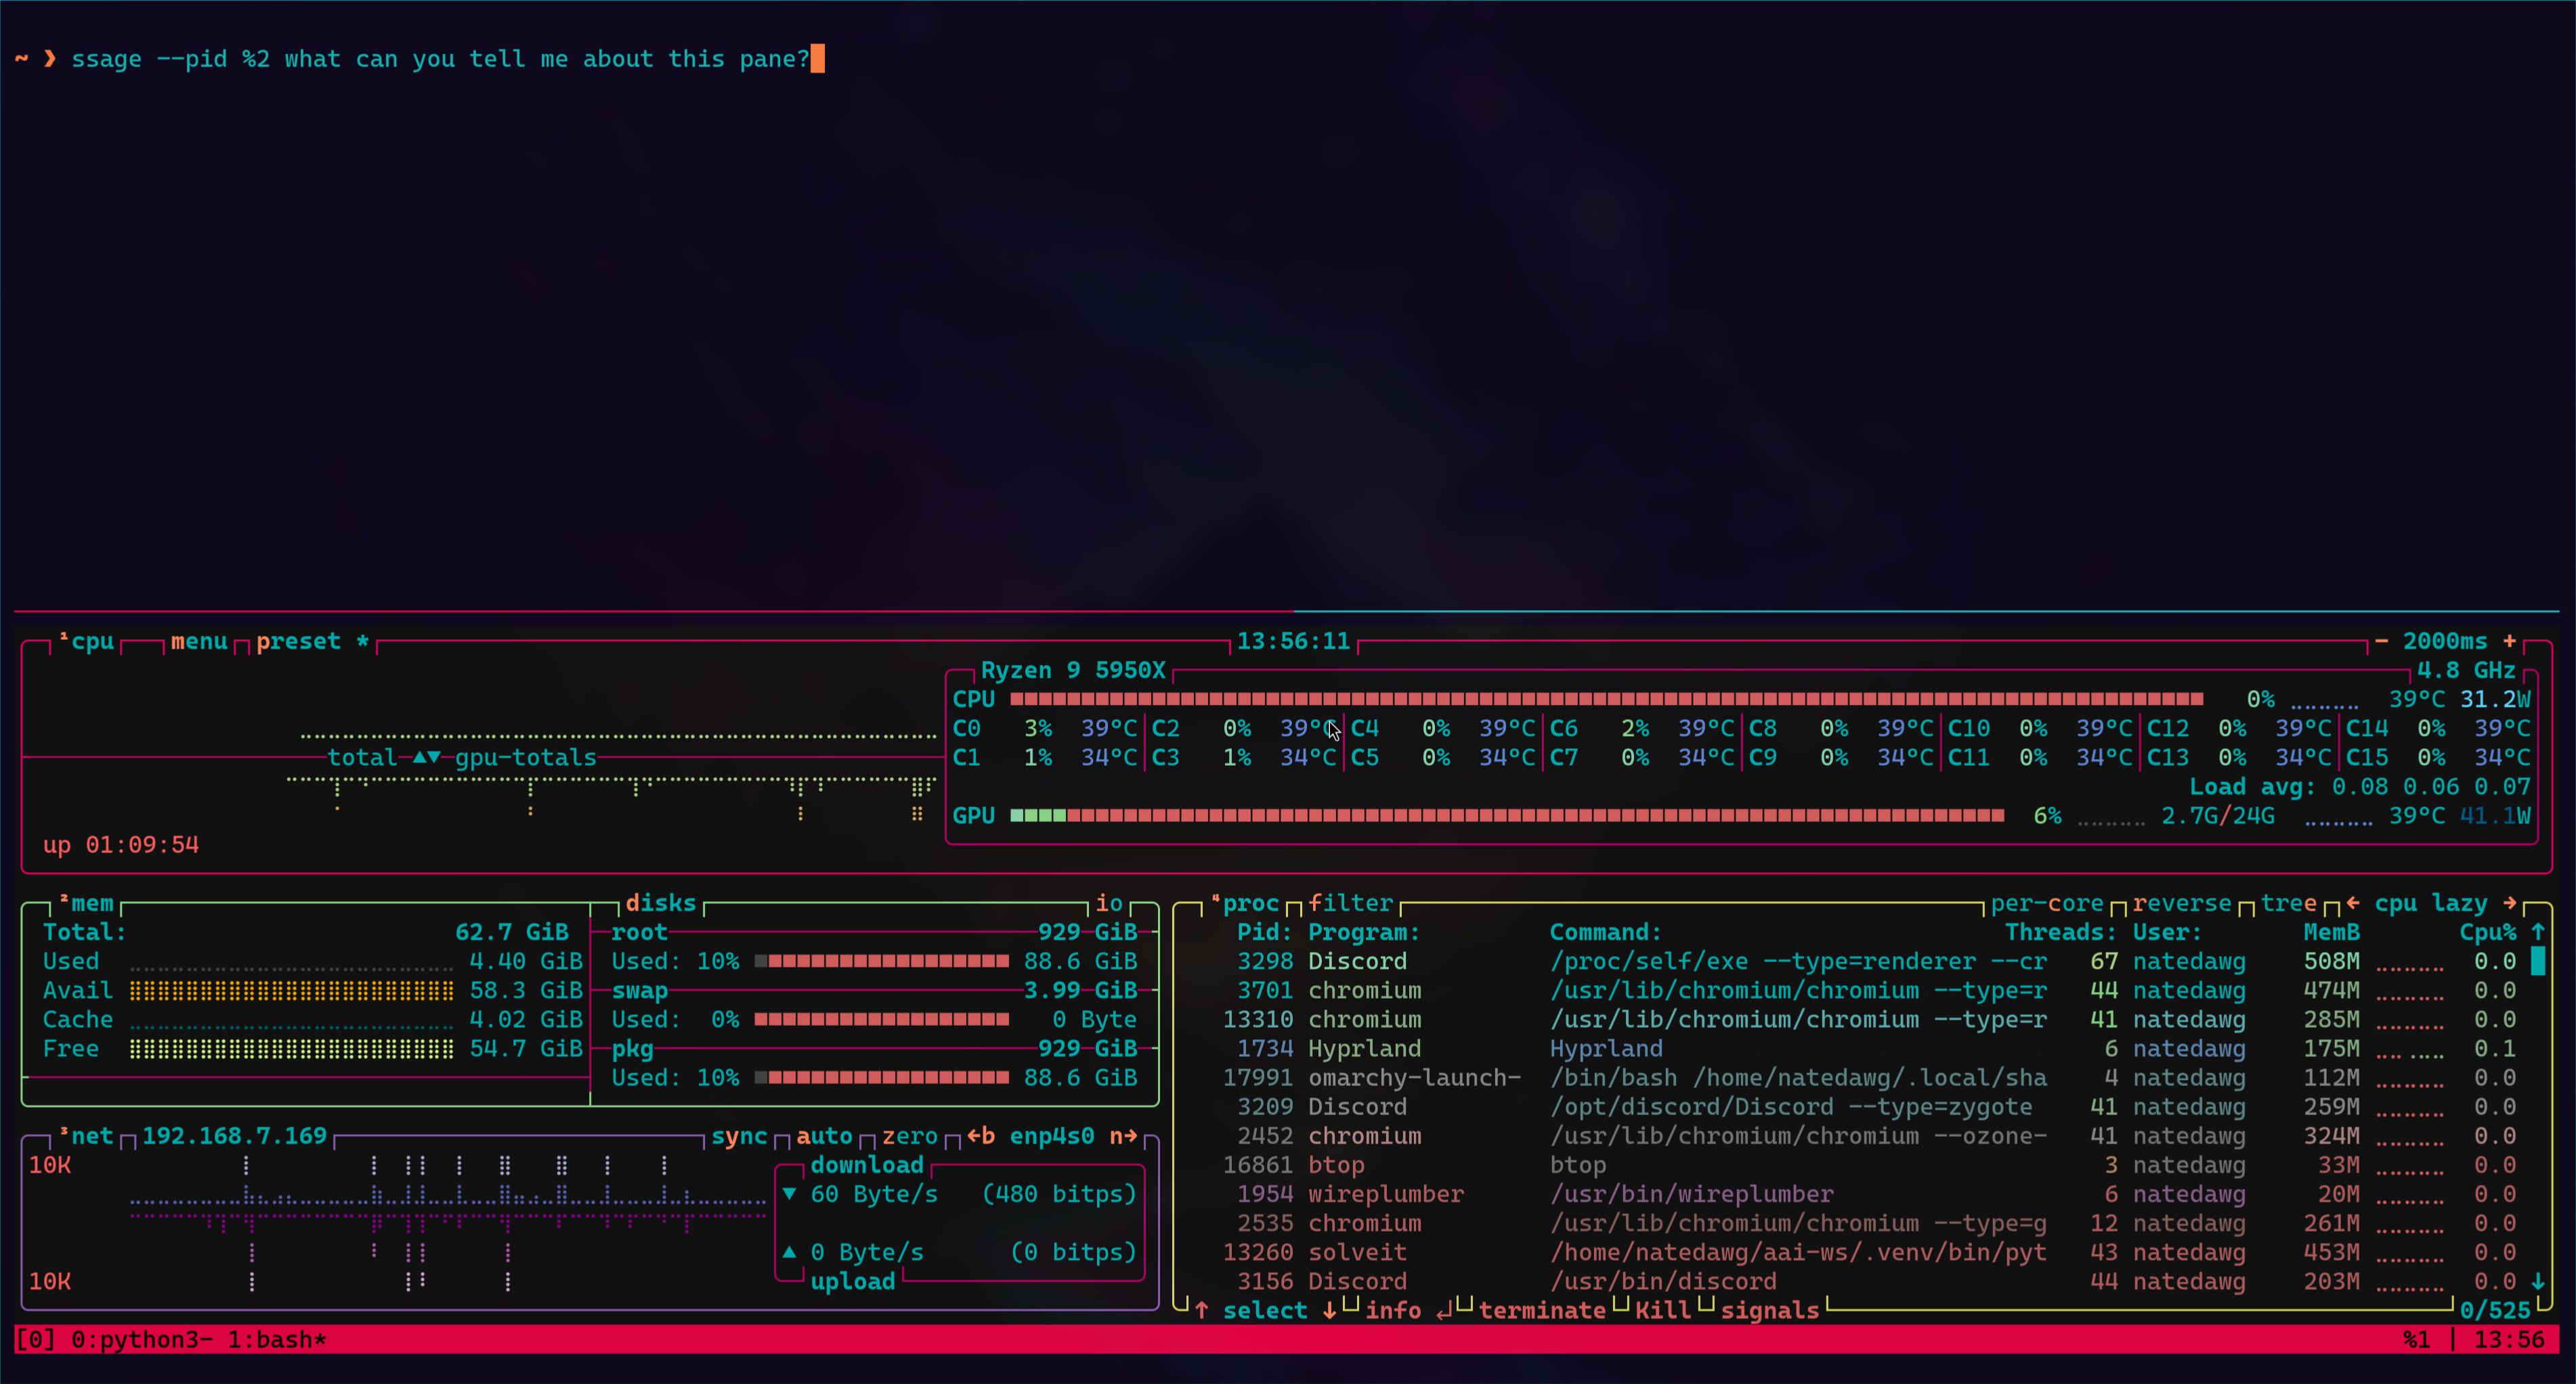

In [ ]:
# Analyze what's happening in pane %2
!ssage --pid %2 "what can you tell me about this pane?"

Looking at this btop system monitor output, here's what I can tell you about the
pane:                                                                           


                                    Overview                                    

This is a comprehensive system resource monitor showing real-time performance   
metrics for your Arch Linux system.                                             


                                Key Information:                                

CPU (Top Section)                                                               

 • AMD Ryzen 9 5950X (32 threads shown as C0-C15)                               
 • Currently at 6% utilization running at 3.8 GHz                               
 • Temperature: 58°C, Power: 53.9W                                              
 • Load average is very light: 0.05, 0.06, 0.08                                 

GPU                                                                             

 • 9% utilization, 

## Configuration and Model Providers

### Configuration File

ShellSage can be customized through a configuration file located at `~/.config/shell_sage/shell_sage.conf`:

```
[DEFAULT]
model = 'claude-sonnet-4-5-20250929'    # Your preferred model
search = ''                             # Enable web search capability (can be either l,m,h https://lisette.answer.ai/#web-search)
mode = 'default'                        # or "sassy"
api_base = ''                           # alternative api url base
api_key = ''                            # alternative api key to use instead of default env var
history_lines = -1                      # Lines of terminal history to include. -1 means include all
code_theme = "monokai"                  # Syntax highlighting theme
code_lexer = "python"                   # Default lexer for inline code blocks
log = False                             # Enable SQLite logging (required for code extraction)
```

### Using Different Model Providers

ShellSage uses [lisette](https://github.com/AnswerDotAI/lisette) under the hood, which supports any LLM provider via [LiteLLM](https://docs.litellm.ai/docs/providers). This means you can use Claude, GPT, Gemini, local models via Ollama, and many others.

#### Local Models with Ollama

For privacy-conscious users or offline usage, run models locally:

```sh
# First, install and start Ollama, then pull a model
ollama pull qwen3:1.7b

# Use with ShellSage
ssage --model ollama_chat/qwen3:1.7b how do I compress a directory?

# Or set as default in your config.toml
model = "ollama_chat/qwen3:1.7b"
```

#### OpenAI

```sh
ssage --model gpt-5 --api_key <your_key_here> explain kubernetes pods
```

#### Google Gemini

```sh
ssage --model gemini/gemini-pro --api_key <your_key_here> what is systemd?
```

#### Other Providers

For any provider supported by LiteLLM, set the appropriate API key and use the provider's model format:

```sh
# Custom API base
ssage --api-base https://your-api.com --api-key your_key --model your_model your query
```

See the [LiteLLM providers documentation](https://docs.litellm.ai/docs/providers) for the complete list of supported providers and their model naming conventions.

### Command Line Overrides

Any configuration option can be temporarily overridden via command line arguments:

```sh
# Adjust history lines
ssage --history-lines 100 what commands did I just run?

# Change the display theme
ssage --code-theme dracula --code-lexer python show me a python example
```

You can find all available code themes and lexers at https://pygments.org/styles/

### Extracting and Running Commands

When ShellSage suggests commands, you can extract them directly to your command line. Note that this feature requires you to have logging enabled in your configuration file:

In [ ]:
!ssage "how do I find large files?"


To find large files on your system, here are the most useful commands:          


            Quick method - Find largest files in current directory:             

                                                                                
 du -ah . | sort -rh | head -20                                                 
                                                                                

This shows the 20 largest files/directories, human-readable sizes, sorted       
largest first.                                                                  


                            More targeted searches:                             

Find files larger than a specific size (e.g., 100MB):                           

                                                                                
 find . -type f -size +100M -exec ls -lh {} \; | sort -k5 -rh                   
                                                                                

Search entire files

ShellSage will respond with code blocks. Press `Ctrl+B E` then enter the index number (0 for first block, 1 for second, etc.) to send that command directly to your prompt. You can also directly use the console script:

In [ ]:
!ssage_extract 0
# inserts "du -ah . | sort -rh | head -20" into your tmux prompt

### Enabling Sassy Mode

For a more entertaining experience, try sassy mode (GLaDOS-inspired):

In [ ]:
!ssage --mode sassy explain git rebase

Ah, git rebase. The command that separates the competent developers from those  
who still think "merge commits" are a personality trait. How delightful that    
you're ready to learn about history rewriting.                                  


                              What is Git Rebase?                               

git rebase is a command that rewrites commit history by moving or combining a   
sequence of commits to a new base commit. Think of it as picking up your branch 
and transplanting it onto a different point in the git tree. It's like time     
travel, but with fewer paradoxes and more merge conflicts.                      


                                  Basic Syntax                                  

                                                                                
 git rebase <base-branch>                                                       
                                                                                


                 How

## Contributing

ShellSage is built using [nbdev](https://nbdev.fast.ai/). For detailed contribution guidelines, please see our [CONTRIBUTING.md](CONTRIBUTING.md) file.

We welcome contributions of all kinds:

- Bug reports
- Feature requests
- Documentation improvements
- Code contributions

Please visit our [GitHub repository](https://github.com/AnswerDotAI/shell_sage) to get started.